In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam


In [371]:

# Here we load the images and do some preprocessing for them. We do the following preprocessing steps:
# - transform the into arrays
# - resize them to a smaller resolution
# - convert the image to B&W
# - Normalize the arrays

def transform_image(kuva):

    kuva = Image.open(kuva)
    new_size = (224, 224)

    resized_image = kuva.resize(new_size, Image.BILINEAR)

    kuva_array = tf.keras.preprocessing.image.img_to_array(resized_image)
    normalized_array = (kuva_array - kuva_array.min()) / (kuva_array.max() - kuva_array.min())
    type(normalized_array)
    return normalized_array


# Iterating through the folders to apply preprocessing for all images in the dataset 

def go_through_folder(folder):
    array_list =[]
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        array = transform_image(file_path)
        array_list.append(array)
        
    return array_list
        
#test_image = transform_image("output/train/benign/SOB_B_A-14-22549AB-400-001.png")   
benign_train = np.array(go_through_folder("output/train/benign"))
malignant_train = np.array(go_through_folder("output/train/malignant"))
benign_test = np.array(go_through_folder("output/test/benign"))
malignant_test = np.array(go_through_folder("output/test/malignant"))
benign_val = np.array(go_through_folder("output/val/benign"))
malignant_val = np.array(go_through_folder("output/val/malignant"))




In [372]:
# Creating the Y labels for their respective images, 1 being a malignant tumor, 0 being a benign tumor
# Also preparing them to their respective train and test sets
benign_train_label = np.zeros(len(benign_train))
benign_test_label = np.zeros(len(benign_test))

malignant_train_label = np.ones(len(malignant_train))
malignant_test_label = np.ones(len(malignant_test))

malignant_val_label = np.ones(len(malignant_val))
benign_val_label = np.zeros(len(benign_val))

min_samples = min(len(benign_train), len(malignant_train))

if len(benign_train) > len(malignant_train):
    indices = np.random.choice(len(benign_train), min_samples, replace=False)  # Valitaan satunnaisesti indeksejä
    benign_train = benign_train[indices]
    benign_train_label = benign_train_label[indices]
else:
    indices = np.random.choice(len(malignant_train), min_samples, replace=False)  # Valitaan satunnaisesti indeksejä
    malignant_train = malignant_train[indices]
    malignant_train_label = malignant_train_label[indices]
    


    
print(len(benign_train), len(malignant_train))

X_train = np.concatenate((benign_train, malignant_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malignant_train_label), axis = 0)


X_test = np.concatenate((benign_test, malignant_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malignant_test_label), axis = 0)

X_val = np.concatenate((benign_val, malignant_val), axis = 0)
Y_val = np.concatenate((benign_val_label, malignant_val_label), axis = 0)


s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

s = np.arange(X_val.shape[0])
np.random.shuffle(s)
X_val = X_val[s]
Y_val = Y_val[s]


print(Y_test)


382 382
[0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [373]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Fit the data generator to your original training data
datagen.fit(X_train)

In [374]:
# Creating the neural network

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(224, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_155 (MaxPool  (None, 111, 111, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_167 (Conv2D)         (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_156 (MaxPool  (None, 54, 54, 128)       0         
 ing2D)                                                          
                                                                 
 conv2d_168 (Conv2D)         (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_157 (MaxPool  (None, 26, 26, 64)      

In [375]:
print(X_train.shape)
optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, Y_train), batch_size = 16, 
                    epochs=20,
                    validation_data=(X_val, Y_val))


(764, 224, 224, 3)
Epoch 1/20


2023-09-22 17:59:31.680565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.6121 - accuracy: 0.7029

2023-09-22 17:59:42.248450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 19s 388ms/step - loss: 0.6121 - accuracy: 0.7029 - val_loss: 0.4507 - val_accuracy: 0.8063
Epoch 2/20
24/24 [==============================] - 7s 293ms/step - loss: 0.5269 - accuracy: 0.7435 - val_loss: 0.4562 - val_accuracy: 0.8300
Epoch 3/20
24/24 [==============================] - 7s 287ms/step - loss: 0.5045 - accuracy: 0.7683 - val_loss: 0.4621 - val_accuracy: 0.7945
Epoch 4/20
24/24 [==============================] - 7s 290ms/step - loss: 0.4795 - accuracy: 0.8024 - val_loss: 0.4239 - val_accuracy: 0.8379
Epoch 5/20
24/24 [==============================] - 7s 282ms/step - loss: 0.4819 - accuracy: 0.7801 - val_loss: 0.4416 - val_accuracy: 0.8221
Epoch 6/20
24/24 [==============================] - 7s 285ms/step - loss: 0.5060 - accuracy: 0.7866 - val_loss: 0.4386 - val_accuracy: 0.8577
Epoch 7/20
24/24 [==============================] - 7s 282ms/step - loss: 0.4738 - accuracy: 0.7971 - val_loss: 0.4287 - val_accuracy: 0.8300
Epoch 8/20
24/24

In [376]:
prediction = model.predict(X_test)

real_prediction = []

for i in prediction:
    if i >= 0.5:
        i = 1
    else:
        i = 0
        
    real_prediction.append(i)

accuracy = accuracy_score(Y_test, real_prediction)
accuracy

2023-09-22 18:02:20.000855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 86ms/step
[[1.05023265e-01]
 [7.41517127e-01]
 [7.04114616e-01]
 [9.86834228e-01]
 [5.20736650e-02]
 [3.38831767e-02]
 [9.57159281e-01]
 [9.86154139e-01]
 [9.76704478e-01]
 [9.62788880e-01]
 [7.27130949e-01]
 [8.51574361e-01]
 [6.91795111e-01]
 [2.34097019e-01]
 [3.02706242e-01]
 [9.63811100e-01]
 [9.78039324e-01]
 [1.03111714e-01]
 [7.59652317e-01]
 [6.94084764e-01]
 [9.19524506e-02]
 [7.14326978e-01]
 [6.76091731e-01]
 [7.08007157e-01]
 [7.20481694e-01]
 [7.55947351e-01]
 [8.04084957e-01]
 [7.99258649e-01]
 [5.04088961e-02]
 [7.24537969e-01]
 [7.77811646e-01]
 [8.93092990e-01]
 [9.50971246e-01]
 [1.38819158e-01]
 [7.39563704e-01]
 [8.02842438e-01]
 [7.41333485e-01]
 [4.65600371e-01]
 [3.48471366e-02]
 [2.88098194e-02]
 [4.00350720e-01]
 [9.61026490e-01]
 [1.07453251e-02]
 [8.22081327e-01]
 [7.55371928e-01]
 [2.68252254e-01]
 [7.65148401e-01]
 [4.02815640e-03]
 [9.64513361e-01]
 [6.94968045e-01]
 [9.63148713e-01]
 [9.48911160e-02]
 [9.96132731

0.87890625

8/8 - 1s - loss: 0.4114 - accuracy: 0.8789 - 862ms/epoch - 108ms/step


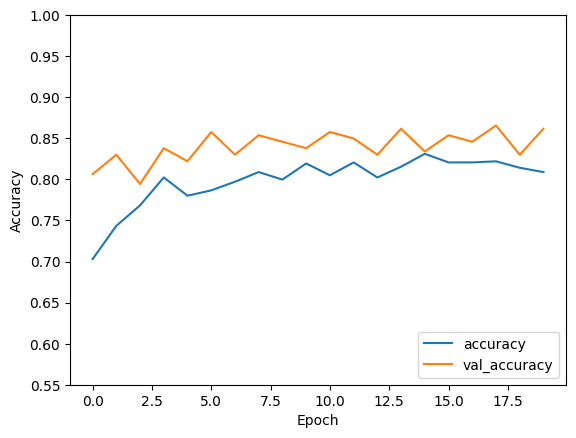

In [377]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.55, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

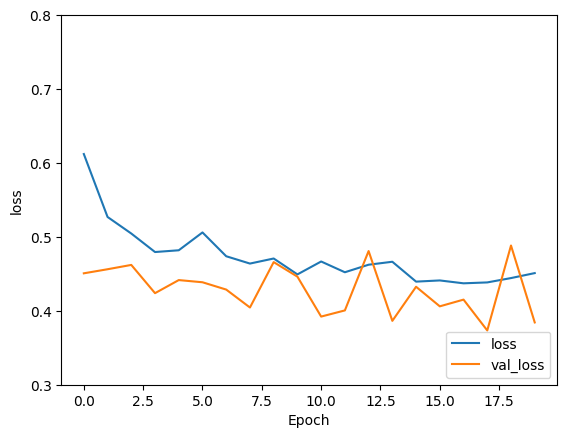

In [378]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylim([0.3, 0.8
         ])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

